In [1]:
%cd ../..

/home/napulen/AugmentedNet


In [2]:
import os

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.font_manager import FontProperties
import pandas as pd
import seaborn as sns

from AugmentedNet.data import available_collections
from AugmentedNet.chord_vocabulary import frompcset
from AugmentedNet.feature_representation import COMMON_ROMAN_NUMERALS, KEYS

In [3]:
summary = "dataset/dataset_summary.tsv"
dfsummary = pd.read_csv(summary, sep="\t")

In [4]:
dataset = ("abc",) #"bps", "haydnsun", "keymodt", "mps", "tavern", "wir", "wirwtc")
otherdatasets = tuple([x for x in available_collections if x not in dataset])

fdataset = {
    ("abc",): "ABC",
    ("bps",): "BPS",
    ("haydnsun",): "HaydnSun",
    ("keymodt",): "KMT",
    ("mps",): "MPS",
    ("tavern",): "TAVERN",
    ("wir", "wirwtc"): "WiR",
    ("abc", "bps", "haydnsun", "keymodt", "mps", "tavern", "wir", "wirwtc"): "Aggregated"
}

In [5]:
datasetdf = dfsummary[dfsummary.collection.isin(dataset)]
othersdf = dfsummary[dfsummary.collection.isin(otherdatasets)]


In [6]:
df = None
for row in datasetdf.itertuples():
    tsvpath = os.path.join("dataset", row.split, f"{row.file}.tsv")
    print(tsvpath)
    dffile = pd.read_csv(tsvpath, sep="\t")
    dffile = dffile[dffile.a_harmonicRhythm == 0]
    dffile["file"] = row.file
    if df is None:
        df = dffile
    else:
        df = pd.concat([df, dffile], ignore_index=True)

# dfothers = None
# for row in othersdf.itertuples():
#     tsvpath = os.path.join("dataset", row.split, f"{row.file}.tsv")
#     print(tsvpath)
#     dffile = pd.read_csv(tsvpath, sep="\t")
#     dffile = dffile[dffile.a_harmonicRhythm == 0]
#     dffile["file"] = row.file
#     if dfothers is None:
#         dfothers = dffile
#     else:
#         dfothers = pd.concat([dfothers, dffile], ignore_index=True)

dataset/training/abc-op131-3.tsv
dataset/training/abc-op95-4.tsv
dataset/training/abc-op132-2.tsv
dataset/training/abc-op95-2.tsv
dataset/training/abc-op130-1.tsv
dataset/training/abc-op95-1.tsv
dataset/training/abc-op127-3.tsv
dataset/training/abc-op18-no6-2.tsv
dataset/training/abc-op127-4.tsv
dataset/training/abc-op130-2.tsv
dataset/training/abc-op18-no5-3.tsv
dataset/training/abc-op59-no1-2.tsv
dataset/training/abc-op59-no1-3.tsv
dataset/training/abc-op18-no4-4.tsv
dataset/training/abc-op18-no5-1.tsv
dataset/training/abc-op132-1.tsv
dataset/training/abc-op74-2.tsv
dataset/training/abc-op18-no5-2.tsv
dataset/training/abc-op127-1.tsv
dataset/training/abc-op18-no3-2.tsv
dataset/training/abc-op18-no2-4.tsv
dataset/training/abc-op131-6.tsv
dataset/training/abc-op135-4.tsv
dataset/training/abc-op135-3.tsv
dataset/training/abc-op18-no2-3.tsv
dataset/training/abc-op18-no6-4.tsv
dataset/training/abc-op59-no3-2.tsv
dataset/training/abc-op59-no3-4.tsv
dataset/training/abc-op59-no2-1.tsv
datas

In [7]:
measures = 0
for f in df.file.unique():
    measures += df[df.file == f].a_measure.max()

print("Duration in quarter notes:", df.a_duration.sum().round())
print("Measures:", measures)
print("Chord annotations:", len(df.index))
print("Average harmonic rhythm:", df.a_duration.mean().round(2))

Duration in quarter notes: 48034.0
Measures: 15746.0
Chord annotations: 29427
Average harmonic rhythm: 1.63


In [8]:
def aggregate_wir(filename):
    if "openscore" in filename:
        return "wir-openscore"
    elif "wirwtc" in filename:
        return "wir-bach-wtc"
    elif "variations" in filename:
        return "wir-variations"
    elif "madrigals" in filename:
        return "wir-madrigals"
    elif "chorales" in filename:
        return "wir-bach-chorales"
    elif "orchestral" in filename:
        return "wir-orchestral"

if dataset == ["wir", "wirwtc"]:
    df["file"] = df["file"].apply(aggregate_wir)
elif dataset == ["keymodt"]:
    df["file"] = df["file"].apply(lambda x: "-".join(x.split("-")[:2]))

In [9]:
order = df.a_inversion.value_counts(ascending=True).index

In [10]:
qualities = {f"Files in {dataset[0].upper()}": [], "Chord Quality": [], "Total Number of Chords": []}
for idx, f in enumerate(df.file.unique()):
    dffile = df[df.file == f]
    countsdf = dffile.a_inversion.value_counts(ascending=True)
    d = countsdf.to_dict()
    print(d)
    totalcount = 0
    print(f)
    for q in order:
        v = d.get(q, 0)
        totalcount += v
        qualities[f"Files in {dataset[0].upper()}"].append(f.split("-", 1)[1])
        qualities["Chord Quality"].append(q)
        qualities["Total Number of Chords"].append(v)
qualitiesdf = pd.DataFrame(qualities)

{3.0: 2, 2.0: 5, 1.0: 9, 0.0: 13}
abc-op131-3
{3.0: 13, 2.0: 50, 1.0: 67, 0.0: 213}
abc-op95-4
{3.0: 4, 2.0: 35, 1.0: 181, 0.0: 335}
abc-op132-2
{3.0: 31, 2.0: 70, 1.0: 75, 0.0: 189}
abc-op95-2
{3.0: 41, 2.0: 77, 1.0: 230, 0.0: 371}
abc-op130-1
{3.0: 3, 2.0: 32, 1.0: 49, 0.0: 172}
abc-op95-1
{3.0: 18, 2.0: 60, 1.0: 156, 0.0: 270}
abc-op127-3
{3.0: 13, 2.0: 26, 1.0: 95, 0.0: 135}
abc-op18-no6-2
{3.0: 51, 2.0: 108, 1.0: 191, 0.0: 365}
abc-op127-4
{3.0: 3, 2.0: 14, 1.0: 48, 0.0: 128}
abc-op130-2
{3.0: 9, 2.0: 22, 1.0: 54, 0.0: 176}
abc-op18-no5-3
{3.0: 18, 2.0: 40, 1.0: 86, 0.0: 351}
abc-op59-no1-2
{3.0: 18, 2.0: 54, 1.0: 96, 0.0: 194}
abc-op59-no1-3
{3.0: 13, 2.0: 52, 1.0: 99, 0.0: 251}
abc-op18-no4-4
{3.0: 26, 2.0: 48, 1.0: 117, 0.0: 251}
abc-op18-no5-1
{3.0: 21, 2.0: 99, 1.0: 166, 0.0: 308}
abc-op132-1
{2.0: 8, 3.0: 15, 1.0: 48, 0.0: 103}
abc-op74-2
{3.0: 13, 2.0: 22, 1.0: 35, 0.0: 111}
abc-op18-no5-2
{3.0: 43, 2.0: 122, 1.0: 185, 0.0: 223}
abc-op127-1
{3.0: 23, 2.0: 64, 1.0: 109, 0.0:

In [11]:
qualitiesdf[qualitiesdf[f"Files in {dataset[0].upper()}"] == 0]

,Files in ABC,Chord Quality,Total Number of Chords


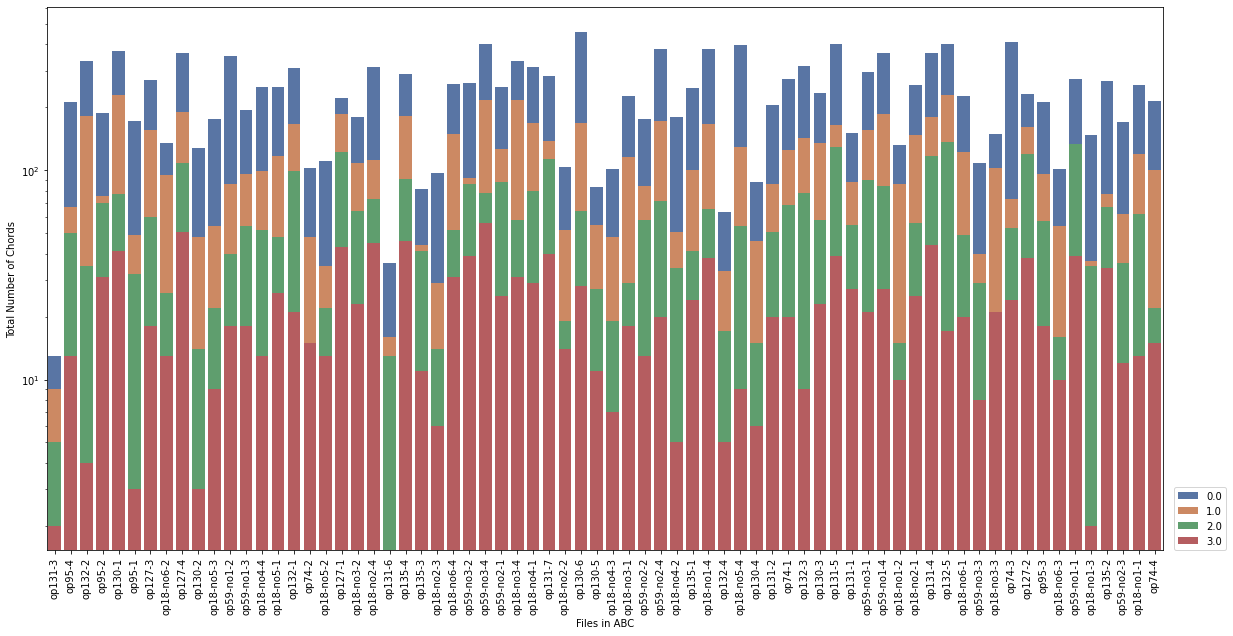

In [12]:
# font = {'family' : 'normal',
#         'size'   : 18}
plt.rcParams["figure.figsize"] = (20, 10)
# plt.rc('font', **font)
sns.barplot(x=f"Files in {dataset[0].upper()}", y="Total Number of Chords", hue="Chord Quality", dodge=False, palette=sns.color_palette("deep", n_colors=10), hue_order=reversed(order), data=qualitiesdf)
plt.yscale("log")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.legend(loc=(1.01, 0))
plt.show()

In [13]:
rns = {
    'I': 'major',
    'i': 'minor',
    'Cad': 'both',
    'ii': 'major',
    'iio': 'minor',
    'N': 'both',
    'iii': 'major',
    'III+': 'minor',
    'IV': 'major',
    'iv': 'minor',
    'It': 'both',
    'Fr7': 'both',
    'Ger7': 'both',
    'V': 'both',
    'V+': 'major',
    'vi': 'major',
    'VI': 'minor',
    'viio': 'both',
    'I7': 'major',
    'i7': 'minor',
    'ii7': 'major',
    'iiø7': "minor",
    'iii7': 'major',
    'III+7': 'minor',
    'IV7': 'major',
    'iv7': 'minor',
    'V7': 'both',
    'vi7': 'major',
    'VI7': 'minor',
    'viiø7': "major",
    'viio7': 'minor',
}

In [14]:
invlabels = {0.0: "Root position", 1.0: "First", 2.0: "Second", 3.0: "Third"}
rnsinv = {f"rn": [], "inversion": [], "counts": []}
for inv in [0.0, 1.0, 2.0, 3.0]:
    invdf = df[df.a_inversion == inv]
    countsrn = invdf.a_romanNumeral.value_counts().to_dict()
    for rn in rns:
        counts = countsrn.get(rn, 0)
        rnsinv["rn"].append(rn)
        rnsinv["inversion"].append(invlabels[inv])
        rnsinv["counts"].append(counts)
rnsinvdf = pd.DataFrame(rnsinv)

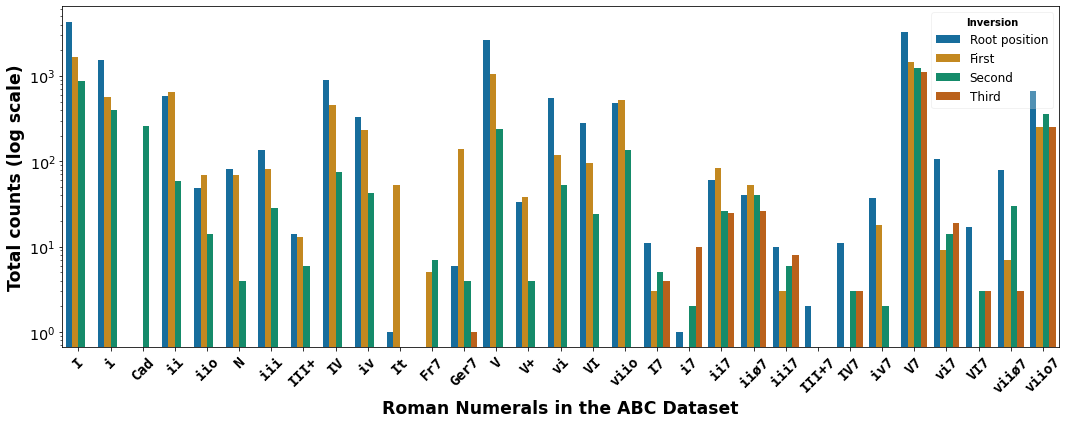

In [31]:
# font = {'family': 'sans', 'size': 14, "weight": "bold"}
plt.rcParams["figure.figsize"] = (15, 6)
# plt.rc('font', **font)
# sns.barplot(x="rn", y="counts", dodge=False, hue="inversion", palette="rocket", saturation=0.7, data=rnsinvdf)
g = sns.barplot(x="rn", y="counts", dodge=True, hue="inversion", palette="colorblind", data=rnsinvdf)
h,l = g.get_legend_handles_labels()
plt.legend(h[:4], l[:4], loc="upper right", fontsize="large", framealpha=0.25, title="Inversion", title_fontproperties={"weight": "bold"})
plt.xlabel(f"Roman Numerals in the {fdataset[dataset]} Dataset", fontsize="xx-large", fontweight="bold")
plt.xticks(rotation=45, fontfamily="monospace", fontsize="x-large", fontweight="bold")
plt.ylabel("Total counts (log scale)", fontsize="xx-large", fontweight="bold")
plt.yscale("log")
plt.yticks(fontsize="x-large")
plt.tight_layout()
plt.savefig(f"{fdataset[dataset].lower()}_rn_inversion.png")

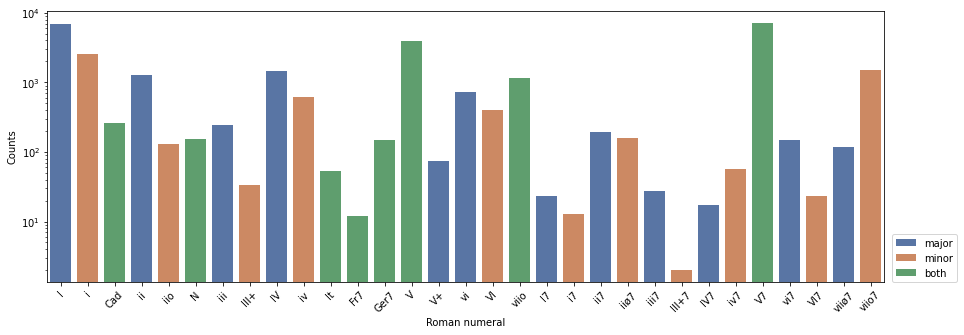

In [16]:
rns = {
    'I': 'major',
    'i': 'minor',
    'Cad': 'both',
    'ii': 'major',
    'iio': 'minor',
    'N': 'both',
    'iii': 'major',
    'III+': 'minor',
    'IV': 'major',
    'iv': 'minor',
    'It': 'both',
    'Fr7': 'both',
    'Ger7': 'both',
    'V': 'both',
    'V+': 'major',
    'vi': 'major',
    'VI': 'minor',
    'viio': 'both',
    'I7': 'major',
    'i7': 'minor',
    'ii7': 'major',
    'iiø7': "minor",
    'iii7': 'major',
    'III+7': 'minor',
    'IV7': 'major',
    'iv7': 'minor',
    'V7': 'both',
    'vi7': 'major',
    'VI7': 'minor',
    'viiø7': "major",
    'viio7': 'minor',
}

rnsdict = {"Roman numeral": [], "Counts": [], "Category": []}

rndict = df.a_romanNumeral.value_counts().to_dict()
for rn in rns:
    counts = rndict.get(rn, 0)
    rnsdict["Roman numeral"].append(rn)
    rnsdict["Counts"].append(counts)
    rnsdict["Category"].append(rns[rn])

rndf = pd.DataFrame(rnsdict)

# font = {'family': 'sans', 'size': 14, "weight": "bold"}
plt.rcParams["figure.figsize"] = (15, 5)
# plt.rc('font', **font)
sns.barplot(x="Roman numeral", y="Counts", dodge=False, hue="Category", palette="deep", data=rndf)
plt.xticks(rotation=45)
plt.legend(loc=(1.01, 0))
plt.yscale("log")

In [17]:
# thispcset = set(df.a_pcset.apply(eval).unique())
# if dataset == ("abc", "bps", "haydnsun", "keymodt", "mps", "tavern", "wir", "wirwtc"):
#     otherspcset = set(frompcset.keys())
# else:
#     otherspcset = set(dfothers.a_pcset.apply(eval).unique())

# missingpcsets = otherspcset - thispcset
# uniquepcsets = thispcset - otherspcset 

# sns.color_palette("rocket")
# venn2([thispcset, otherspcset], set_labels=("PCSets in this dataset", "PCSets in other datasets"))

# print(len(missingpcsets), missingpcsets)
# print()
# print(len(uniquepcsets), uniquepcsets)
# plt.tight_layout()
# plt.savefig(f"{fdataset[dataset].lower()}_pcset_venn.png")

In [18]:
missingrns = set(COMMON_ROMAN_NUMERALS) - set(df.a_romanNumeral.unique())
print(len(missingrns), missingrns)

0 set()


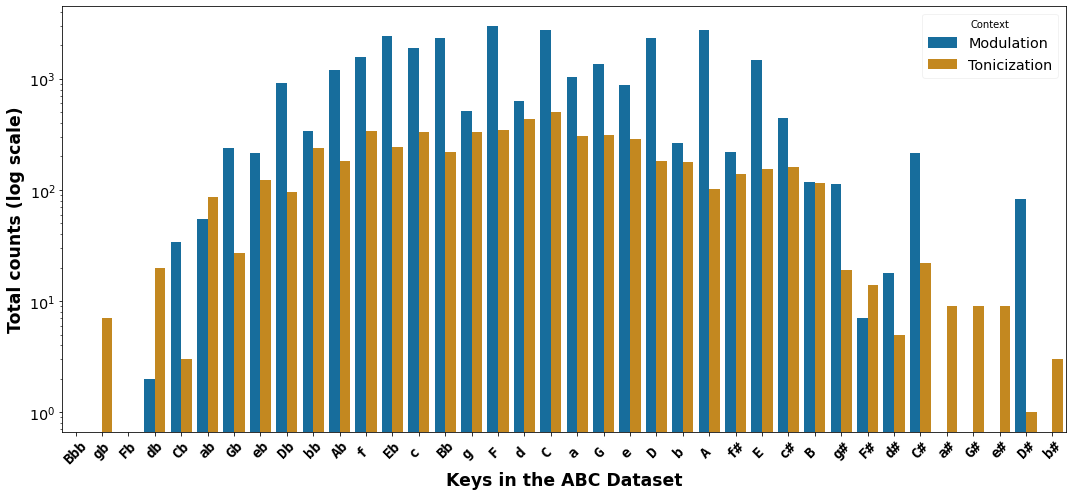

In [19]:
def format_key(key):
    ret = key
    # ret = ret.replace("--", u"bb")
    # ret = ret.replace("-", "♭")
    ret = ret.replace("-", "b")
    # ret = ret.replace("#", "♯")
    ret += " " * (2 - len(ret))
    return ret
    
allkeys = ["B--", "g-", "F-", "d-", "C-", "a-", "G-", "e-", "D-", "b-", "A-", "f", "E-", "c", "B-", "g", "F", "d", "C"] + [
    "a", "G", "e", "D", "b", "A", "f#", "E", "c#", "B", "g#", "F#", "d#", "C#", "a#", "G#", "e#", "D#", "b#"]

keysdict = {"Key": [], "Context": [], "Counts": []}

moddict = df.a_localKey.value_counts().to_dict()
for k in allkeys:
    counts = moddict.get(k, 0)
    keysdict["Key"].append(format_key(k))
    keysdict["Context"].append("Modulation")
    keysdict["Counts"].append(counts)

tondict = df[df.a_tonicizedKey != df.a_localKey].a_tonicizedKey.value_counts().to_dict()
for k in allkeys:
    counts = tondict.get(k, 0)
    keysdict["Key"].append(format_key(k))
    keysdict["Context"].append("Tonicization")
    keysdict["Counts"].append(counts)

keysdf = pd.DataFrame(keysdict)

# plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (15, 7)
# sns.barplot(x="Key", y="Counts", hue="Context", dodge=False, palette="colorblind", data=keysdf)
g = sns.barplot(x="Key", y="Counts", hue="Context", dodge=True, palette="colorblind", data=keysdf)
h,l = g.get_legend_handles_labels()
plt.legend(h[:2], l[:2], loc="upper right", fontsize="x-large", framealpha=0.25, title="Context")
plt.xlabel(f"Keys in the {fdataset[dataset]} Dataset", fontsize="xx-large", fontweight="bold")
plt.xticks(fontfamily="monospace", fontsize="x-large", fontweight=1000, rotation=45)
plt.yscale("log", base=10)
plt.yticks(fontsize="x-large")
plt.ylabel("Total counts (log scale)", fontsize="xx-large", fontweight="bold")
plt.tight_layout()
plt.savefig(f"{fdataset[dataset].lower()}_key_mod_ton.png")